In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector

In [4]:
# Connect to server
import pandas as pd
con = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Harsh2025",
    database="students")

data=pd.read_sql_query("select * from studmarks",con)    
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-05-04,55,45,56,87,21,52,89,65
1,Suresh,M,1987-04-05,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-12-08,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-02-09,58,96,78,46,96,77,83,53
5,Annu,F,1988-05-04,45,87,52,89,55,89,87,52
6,pooja,F,1987-04-05,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-12-08,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-02-09,96,46,77,83,58,83,46,77


In [5]:
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [6]:
# Checking data types & null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [7]:
le = preprocessing.LabelEncoder()
data['Name'] = le.fit_transform(data.Name.values)
data['Name'] = data['Name'].astype('int64')

In [8]:
le = preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data.Gender.values)
data['Gender'] = data['Gender'].astype('int64')

In [9]:
data.head(10)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,4,1,1988-05-04,55,45,56,87,21,52,89,65
1,8,1,1987-04-05,75,96,78,64,90,61,58,2
2,6,1,1989-05-25,25,54,89,76,95,87,56,74
3,3,0,1990-12-08,78,96,86,63,54,89,75,45
4,2,0,1989-02-09,58,96,78,46,96,77,83,53
5,0,0,1988-05-04,45,87,52,89,55,89,87,52
6,9,0,1987-04-05,55,64,61,58,75,58,64,61
7,7,1,1989-05-25,54,76,87,56,25,56,76,87
8,1,0,1990-12-08,55,63,89,75,78,75,63,89
9,5,1,1989-02-09,96,46,77,83,58,83,46,77


In [10]:
data.dtypes

Name          int64
Gender        int64
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

# EDA Process-

In [11]:
data.shape

(10, 11)

In [12]:
data.describe()

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,4.50000,0.500000,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,3.02765,0.527046,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,0.00000,0.000000,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,2.25000,0.000000,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,4.50000,0.500000,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,6.75000,1.000000,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,9.00000,1.000000,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [13]:
# class distribution of target 
print(data.groupby('Gender').size())

Gender
0    5
1    5
dtype: int64


In [14]:
# Checking for skewness
data.skew()

Name         0.000000
Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

Its observed that no skewness found in this data, as skewness allowed till 0.5 only

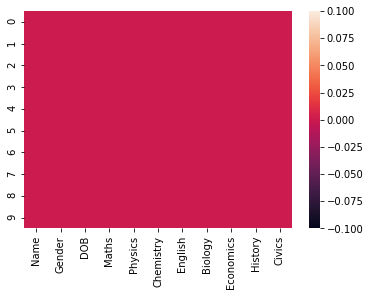

In [15]:
# Checking missing values using heatmap
sns.heatmap(data.isnull())

In [16]:
# Check null values using info() function or isnull() or notnull() method.
nullval=data.isnull().sum()
nullval

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [17]:
import pandas as pd

cols = data.columns.tolist()
print(cols)

['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology', 'Economics', 'History', 'Civics']


# Data Visualization - Unvariate plot / Multivariant Plot

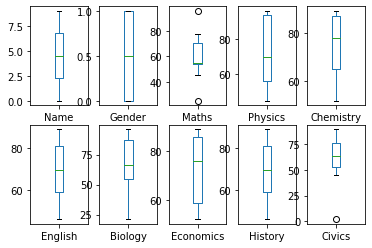

In [18]:
# Data Visualization - Unvariate plot (box and whisker plots)
data.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

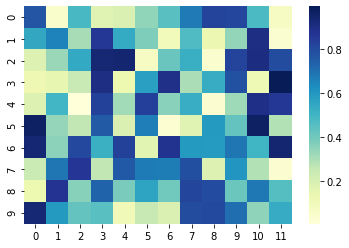

In [19]:
# Data Visualization - Multivariate Plots
import numpy as np
import seaborn as sns
data = np.random.rand(10, 12)
ax = sns.heatmap(data, cmap="YlGnBu")

# Preparing X & y for Machine Learning Algorithm -

In [20]:
import pandas as pd

data=pd.read_sql_query("select * from studmarks",con) 
le = preprocessing.LabelEncoder()
data['Name'] = le.fit_transform(data.Name.values)
data['Name'] = data['Name'].astype('int64')

feature_cols = ['Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']
X = data[feature_cols]
#X = data[[Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']]

#y = data.Name  # y is a vector, hence we use dot to access 'label'

In [21]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(10, 8)


In [22]:
# select a Series from the DataFrame
y = data['Name']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = data.Name

# print the first 5 values
y.head(10)

0    4
1    8
2    6
3    3
4    2
5    0
6    9
7    7
8    1
9    5
Name: Name, dtype: int64

In [23]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(10,)


# Apply Linear Regression Model as target value is continuos - 

In [24]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 8)
(3, 8)
(7,)
(3,)


In [25]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Interpreting model coefficients
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

24.07170598358111
[-0.03188187  0.04800983  0.03479528 -0.03820982 -0.05981254 -0.1330017
 -0.08551243 -0.05107952]


In [27]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [28]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  4.967016478543379
Mean Sqr Error:    24.99123223623017
Root mean sqr error:  4.999123146735853


In [29]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.30)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.30)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 60  is  0.6885968142240365


In [30]:
from sklearn.svm import SVR
kernellist=['linear','poly']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

0.9974977272952971
0.9978248757402136


In [31]:
from sklearn.svm import SVR

svr = SVR(kernel = "linear")
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
pred_y=svr.predict(X_test)
print(pred_y)

0.9974977272952971
[ 0.087192    5.27090184 10.15488857]


In [32]:
svr = SVR(kernel = "poly")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)
pred_y=svr.predict(X_test)
print(pred_y)

[1.49616112 5.30265964 8.4620934 ]


In [35]:
from sklearn.externals import joblib

joblib_file = "joblib_svr.pkl"             # Save to file in the current working directory
joblib.dump(svr, joblib_file)
joblib_svr = joblib.load(joblib_file)      # Load from file
score = joblib_svr.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Support Vector Machine Model: {0:.2f} %".format(100 * score))

Test score for Support Vector Machine Model: -2108.80 %


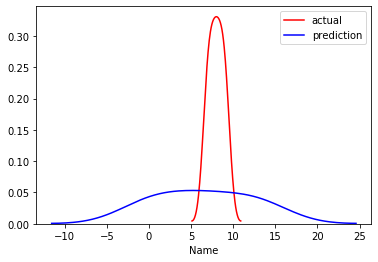

In [36]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-Logistic Regression giving more accuracy than linear regression for student marks dataset. 